In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris(as_frame=False)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
# If iris is not a frame
iris = pd.DataFrame(np.concatenate([iris.data, iris.target.reshape(-1,1)], axis=1),
                    columns= iris.feature_names + ['target'])

In [4]:
iris = iris[iris.loc[:, "target"]< 2]

In [5]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


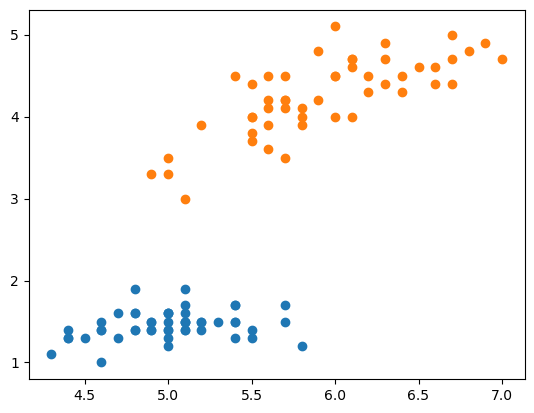

In [6]:
plt.scatter(iris[iris["target"] == 0].iloc[:, 0], iris[iris["target"] == 0].iloc[:, 2])
plt.scatter(iris[iris["target"] == 1].iloc[:, 0], iris[iris["target"] == 1].iloc[:, 2])
plt.show()

In [7]:
X = np.array(iris.iloc[:, :-1]).astype(np.float32)
y = np.array(iris.iloc[:, -1]).astype(np.float32)

# Standard Scaler mean of 0 and variance of 1

In [8]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_scaled = (X - mean)/std

In [9]:
np.random.seed(42)

X = np.array(X)
y = np.array(y)

indices = np.random.permutation(len(X))
print(f"List of indices:\n{indices}")

X_shuffled = X_scaled[indices]
y_shuffled = y[indices]

rows, cols = X_shuffled.shape

rows_90 = np.int_(rows * 0.90)

X_train, X_test = X_shuffled[:rows_90,:], X_shuffled[rows_90:, :]
y_train, y_test = y_shuffled[:rows_90], y_shuffled[rows_90:]

List of indices:
[83 53 70 45 44 39 22 80 10  0 18 30 73 33 90  4 76 77 12 31 55 88 26 42
 69 15 40 96  9 72 11 47 85 28 93  5 66 65 35 16 49 34  7 95 27 19 81 25
 62 13 24  3 17 38  8 78  6 64 36 89 56 99 54 43 50 67 46 68 61 97 79 41
 58 48 98 57 75 32 94 59 63 84 37 29  1 52 21  2 23 87 91 74 86 82 20 60
 71 14 92 51]


In [17]:
class SVC_scratch:
    def __init__(self, epochs= 100, c=0.01, batch_size=32, lr=0.01):
        if epochs < 0:
            raise ValueError("epoch must be positive")
            
        if lr < 0:
            raise ValueError("learning rate must be positive")
            
        if batch_size < 0:
            raise ValueError("Batch size must be positive")
        self.c = c
        self.epochs = epochs
        self.batch_size = batch_size
        self.lr = lr
        

    def fit(self, X, y):
        if X.shape[0] != y.shape[0]:
            raise ValueError(f"Features must have the same amount of samples than labels: {X.shape[0]} != {y.shape[0]}")
        
        self.samples, self.features = X.shape
        self.weights = np.random.rand(self.features + 1, 1).astype(np.float32)

        y_1 = np.where(y==0, -1, y).reshape(-1, 1)
        

        x_1 = np.hstack((np.ones((self.samples, 1)), X))
        batches = (self.samples + self.batch_size -1) // self.batch_size

        for epoch in range(self.epochs):
            indices = np.random.permutation(self.samples)
            x_1_shuffled, y_1_shuffled = x_1[indices], y_1[indices]
        
            total_loss = 0
            total_samples = 0
            for batch in range(batches):
                start = batch * self.batch_size
                end = min((batch + 1) * self.batch_size, self.samples)
                
                X_batch = x_1[start:end]
                y_batch = y_1[start:end]
                N = X_batch.shape[0] # batch samples

                #Prediction + loss
                y_pred = np.dot(X_batch, self.weights)
                loss = self.loss(y_pred, y_batch)

                #Gradient
                margin = 1 - np.multiply(y_batch, y_pred)
                indicator = (margin > 0).astype(np.float32)
                gradient = self.weights - (self.c / N) * np.dot(X_batch.T, indicator * y_batch)
                self.weights -= self.lr*gradient

                total_loss += loss * N
                total_samples += N
                avg_loss = total_loss/total_samples
            
            print(f"Epoch: {epoch+1}/{self.epochs} Training loss: {avg_loss:.4f}")     

    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model must train before predicting")
             
        samples, features = X.shape
        x_1 = np.hstack((np.ones((samples, 1)), X))
        return np.dot(x_1, self.weights) > 0

    def loss(self, y_hat, y):
        if y_pred.shape[0] != y_true.shape[0]:
            raise ValueError(f"Predictions and labels must have the same size: {y_pred.shape} != {y_true.shape}")
        m  = y.shape[0]

        norm_w =  1/2 * np.power(np.linalg.norm(self.weights), 2)
        margin = 1 - np.multiply(y, y_hat)
        hinge_loss = np.maximum(0, margin)
        return norm_w + (self.c / m) * np.sum(hinge_loss)        
    

In [32]:
svc = SVC_scratch(c=1, epochs=200)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

3
Epoch: 1/200 Training loss: 1.0465
Epoch: 2/200 Training loss: 0.9920
Epoch: 3/200 Training loss: 0.9407
Epoch: 4/200 Training loss: 0.8924
Epoch: 5/200 Training loss: 0.8468
Epoch: 6/200 Training loss: 0.8040
Epoch: 7/200 Training loss: 0.7638
Epoch: 8/200 Training loss: 0.7261
Epoch: 9/200 Training loss: 0.6908
Epoch: 10/200 Training loss: 0.6580
Epoch: 11/200 Training loss: 0.6272
Epoch: 12/200 Training loss: 0.5984
Epoch: 13/200 Training loss: 0.5716
Epoch: 14/200 Training loss: 0.5467
Epoch: 15/200 Training loss: 0.5237
Epoch: 16/200 Training loss: 0.5025
Epoch: 17/200 Training loss: 0.4828
Epoch: 18/200 Training loss: 0.4648
Epoch: 19/200 Training loss: 0.4484
Epoch: 20/200 Training loss: 0.4332
Epoch: 21/200 Training loss: 0.4188
Epoch: 22/200 Training loss: 0.4052
Epoch: 23/200 Training loss: 0.3926
Epoch: 24/200 Training loss: 0.3808
Epoch: 25/200 Training loss: 0.3696
Epoch: 26/200 Training loss: 0.3591
Epoch: 27/200 Training loss: 0.3496
Epoch: 28/200 Training loss: 0.3411

In [33]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.svm import SVC

In [34]:
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Confusion matrix normalized:\n{confusion_matrix(y_test, y_pred, normalize='true')}")

Confusion matrix:
[[2 0]
 [0 8]]
Confusion matrix normalized:
[[1. 0.]
 [0. 1.]]


In [36]:
SVC_sk = SVC(C=1, max_iter=200,random_state=42)
SVC_sk.fit(X_train, y_train)

SVC(C=1, max_iter=200, random_state=42)

In [37]:
y_pred_sk = SVC_sk.predict(X_test)
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred_sk)}")
print(f"Confusion matrix normalized:\n{confusion_matrix(y_test, y_pred_sk, normalize='true')}")

Confusion matrix:
[[2 0]
 [0 8]]
Confusion matrix normalized:
[[1. 0.]
 [0. 1.]]
